# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import Dataset

In [2]:
df_train = pd.read_csv("data/train.csv")
df_train_labels = pd.read_csv("data/train_labels.csv")

In [3]:
df_train

,session_id,index,elapsed_time,event_name,name,level,page,room_coor_x,room_coor_y,screen_coor_x,screen_coor_y,hover_duration,text,fqid,room_fqid,text_fqid,fullscreen,hq,music,level_group
0,20090312431273200,0,0,cutscene_click,basic,0,NaN,-413.991405,-159.314686,380.0,494.0,NaN,undefined,intro,tunic.historicalsociety.closet,tunic.historicalsociety.closet.intro,NaN,NaN,NaN,0-4
1,20090312431273200,1,1323,person_click,basic,0,NaN,-413.991405,-159.314686,380.0,494.0,NaN,"Whatcha doing over there, Jo?",gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,NaN,NaN,NaN,0-4
2,20090312431273200,2,831,person_click,basic,0,NaN,-413.991405,-159.314686,380.0,494.0,NaN,Just talking to Teddy.,gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,NaN,NaN,NaN,0-4
3,20090312431273200,3,1147,person_click,basic,0,NaN,-413.991405,-159.314686,380.0,494.0,NaN,I gotta run to my meeting!,gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,NaN,NaN,NaN,0-4
4,20090312431273200,4,1863,person_click,basic,0,NaN,-412.991405,-159.314686,381.0,494.0,NaN,"Can I come, Gramps?",gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,NaN,NaN,NaN,0-4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13174206,22100221145014656,1600,5483231,navigate_click,undefined,22,NaN,343.887291,36.701026,483.0,273.0,NaN,NaN,NaN,tunic.capitol_2.hall,NaN,NaN,NaN,NaN,13-22
13174207,22100221145014656,1601,5485166,navigate_click,undefined,22,NaN,332.696070,141.493178,545.0,221.0,NaN,NaN,chap4_finale_c,tunic.capitol_2.hall,NaN,NaN,NaN,NaN,13-22
13174208,22100221145014656,1602,5485917,navigate_click,undefined,22,NaN,369.912859,140.569205,611.0,217.0,NaN,NaN,NaN,tunic.capitol_2.hall,NaN,NaN,NaN,NaN,13-22
13174209,22100221145014656,1603,5486753,navigate_click,undefined,22,NaN,252.299653,123.805889,526.0,232.0,NaN,NaN,chap4_finale_c,tunic.capitol_2.hall,NaN,NaN,NaN,NaN,13-22


In [4]:
df_train_labels

,session_id,correct
0,20090312431273200_q1,1
1,20090312433251036_q1,0
2,20090314121766812_q1,1
3,20090314363702160_q1,1
4,20090314441803444_q1,1
...,...,...
212017,22100215342220508_q18,1
212018,22100215460321130_q18,1
212019,22100217104993650_q18,1
212020,22100219442786200_q18,1


# Customer Functions

In [32]:
# Outliners dectection
def outliner_bounds(data, sd: float = 3.0) -> tuple[2]:
    """
        Given a series and desired STD, find the upper and lower bounds for outliner.
    """
    mean = pd.Series.mean(data)
    std = pd.Series.std(data)
    return(
        mean - sd * std,
        mean + sd * std
    )

# Explore the Distribution

In [39]:
print(f"Number of unique session_id: {len(df_train['session_id'].unique())}")
df_pivot = df_train.groupby(["session_id"])[["index", "elapsed_time"]].max()
df_pivot

Number of unique session_id: 11779


,index,elapsed_time
session_id,,
20090312431273200,931,1272679
20090312433251036,1875,3815334
20090314121766812,1082,2133782
20090314363702160,1116,4208427
20090314441803444,832,1275750
...,...,...
22100215342220508,913,57742000
22100215460321130,1021,2104501
22100217104993650,1248,2103885


In [36]:
# Remove outliers which STD > 4
index_bounds = outliner_bounds(df_pivot["index"], sd = 4)
elapsed_bounds = outliner_bounds(df_pivot["elapsed_time"], sd = 4)
df_pivot = df_pivot[(df_pivot["index"].between(index_bounds[0], index_bounds[1])) & (df_pivot["elapsed_time"].between(elapsed_bounds[0], elapsed_bounds[1]))]

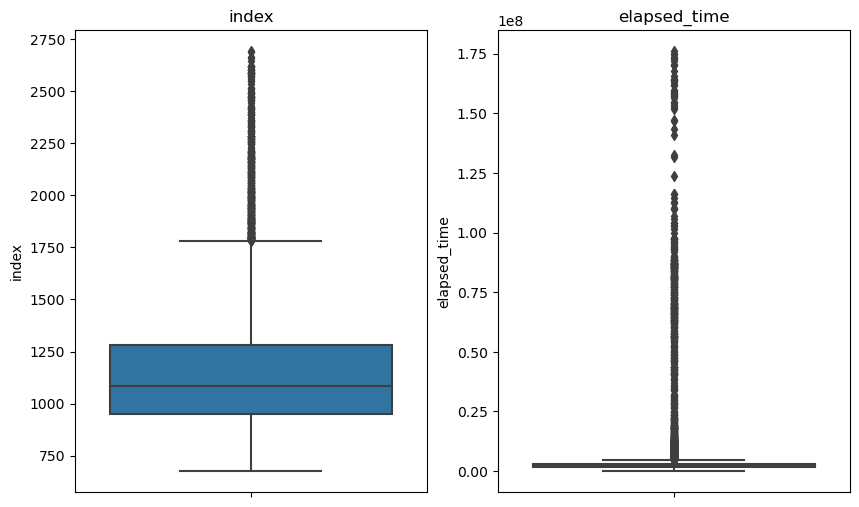

In [37]:
fig, axes = plt.subplots(1, 2, figsize = (10, 6))
sns.boxplot(ax = axes[0], y = df_pivot["index"])
axes[0].set_title("index")
sns.boxplot(ax = axes[1], y = df_pivot["elapsed_time"])
axes[1].set_title("elapsed_time")
plt.show()

# EDA

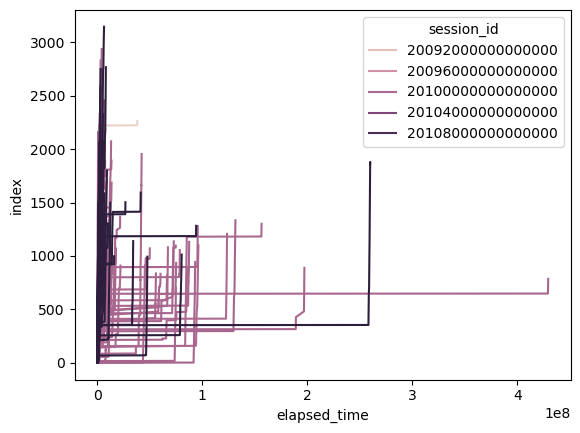

In [38]:
sns.lineplot(data = df_train[:1_000_000], x = "elapsed_time", y = "index", hue = "session_id")
plt.show()

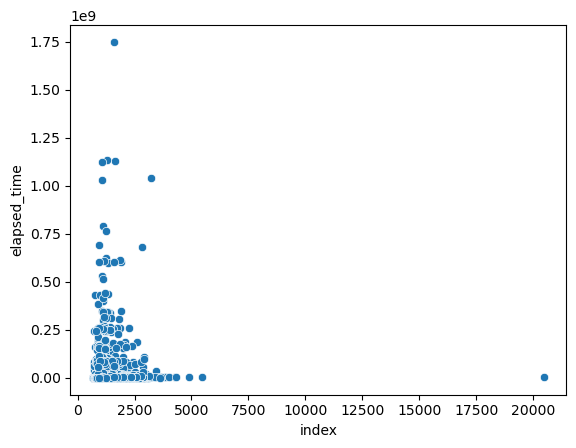

In [41]:
sns.scatterplot(df_pivot, x = "index", y = "elapsed_time")
plt.show()